In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
%%time
# Importing the csv 
users = pd.read_csv('users.csv')

# Displaying the first 5 lines of the csv 
users.head(10)

<string>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 38.2 s, sys: 1min 39s, total: 2min 17s
Wall time: 20min 59s


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31
5,z5_82komKV3mI4ASGe2-FQ,Steve,186,2007-02-27 07:09:40,642,192,155,2007,"E-fXXmALnZTPmzzL6rV4cQ, L2g6vS1GDfqLEpiDOFfCkA...",15,...,16,7,7,2,60,36,32,32,8,9
6,ttumcu6hWshk_EJVWrduDg,Stuart,12,2010-05-12 16:30:08,29,4,6,NaN,"1pKOc55fFx09J5t2rPzTxw, HYpE14yYEKSgu3VNVzObHA...",0,...,0,0,0,0,2,3,0,0,0,1
7,f4_MRNHvN-yRn7EA8YWRxg,Jennifer,822,2011-01-17 00:18:23,4127,2446,2878,"2011,2012,2013,2014,2015,2016,2017,2018","c-Dja5bexzEWBufNsHfRrQ, 02HJNyOzzYXvEKVApJb8GQ...",137,...,81,62,35,24,193,541,623,623,293,172
8,UYACF30806j2mfbB5vdmJA,Justin,14,2007-07-24 23:55:21,68,21,34,NaN,"YwaKGmRNnSa3R3N4Hf9jLw, v9YpDzYkJarRbzvVIY-63g...",4,...,3,0,0,0,3,4,0,0,2,1
9,QG13XBbgHWydzThRBGJtyw,Claire,218,2007-06-04 00:14:10,587,372,426,"2008,2009","tnfVwTpuPlR6W2xEAMiqsg, Bd_16T8Dva27lF5LIrUmcQ...",31,...,5,1,5,3,18,24,37,37,17,5


**First-look observations**

- The `user_id` can be used later on to join the tables so we'll defintely need this along with the individual `name` and `review_count` to understand the number of reviews the user has posted.
- 
- The `friends` column will be dropped because there seems to be a lot of encryption and uniqueness that we don't want to waste our time figuring out!
- The `elite` column will be also be droppped



**Curiousity leads to finding out some great insights, let's try this out and look at the following:** 

- Top 10 reviewers
- Top 5 reviewers with **useful** upvotes
- Top 5 reviewers with **funny** upvotes
- Top 5 reviewers with **cool** upvotes
- 5 popular individuals with the most fans
- 
- 


**Understanding How the User Base Has Increased Over Time**

In [9]:
# Converting date column data type from object to datetime just incase 
users['yelping_since'] = pd.to_datetime(users['yelping_since'])

# Converting true_df date columns into year, month and day
# Extracting the year of publishing
users['Member since - Year'] = users['yelping_since'].dt.year

# Extracting the month of the year
users['Member since - Month'] = users['yelping_since'].dt.month_name()

# Extracting the day of the month
users['Member since - Day'] = users['yelping_since'].dt.day

# Extracting hour of day
users['Member since - Hour'] = users['yelping_since'].dt.hour

# Extracting day of week
users['Member since - DayofWeek'] = users['yelping_since'].dt.day_name()


# Let's take a look at the dataframe now as it shouldve added 5 columns
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Member since - Year,Member since - Month,Member since - Day,Member since - Hour,Member since - DayofWeek
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,15,22,22,10,0,2007,July,6,3,Friday
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,37,63,63,21,5,2008,April,28,1,Monday
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,7,17,17,4,1,2008,August,28,23,Thursday
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,14,7,7,2,0,2008,September,20,0,Saturday
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,28,31,31,19,31,2008,August,9,0,Saturday


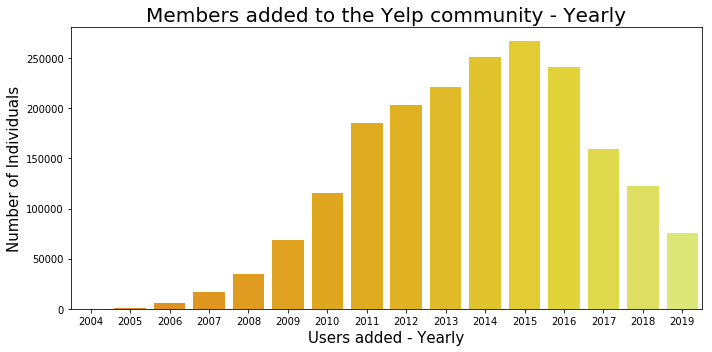

In [16]:
# Let's see how the users have changed over the years
plt.figure(figsize = (10,5))
sns.countplot(users['Member since - Year'], palette = 'Wistia_r' )
plt.xlabel('Users added - Yearly', fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Members added to the Yelp community - Yearly', fontsize = 20)
plt.tight_layout()
plt.show()

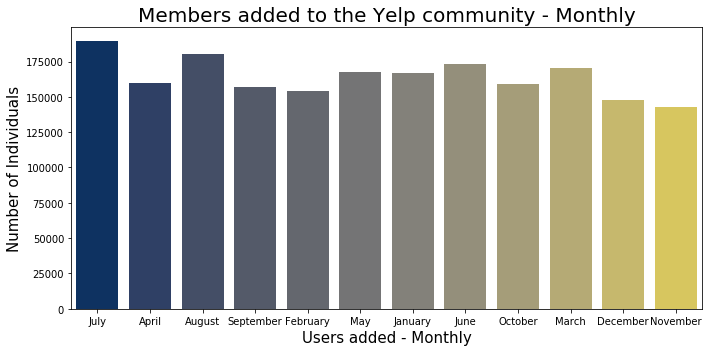

In [17]:
# Let's see how the users have changed over the months
plt.figure(figsize = (10,5))
sns.countplot(users['Member since - Month'], palette = 'cividis')
plt.xlabel('Users added - Monthly', fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Members added to the Yelp community - Monthly', fontsize = 20)
plt.tight_layout()
plt.show()

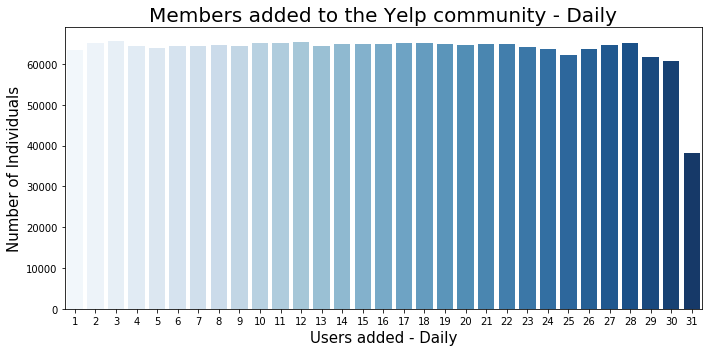

In [18]:
# Let's see how the users have changed over the days
plt.figure(figsize = (10,5))
sns.countplot(users['Member since - Day'], palette = 'Blues' )
plt.xlabel('Users added - Daily', fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Members added to the Yelp community - Daily', fontsize = 20)
plt.tight_layout()
plt.show()

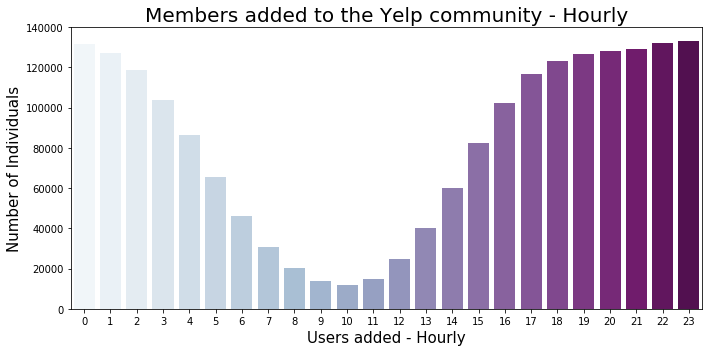

In [19]:
# Let's see how the users have changed over the hour
plt.figure(figsize = (10,5))
sns.countplot(users['Member since - Hour'], palette = 'BuPu' )
plt.xlabel('Users added - Hourly', fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Members added to the Yelp community - Hourly', fontsize = 20)
plt.tight_layout()
plt.show()

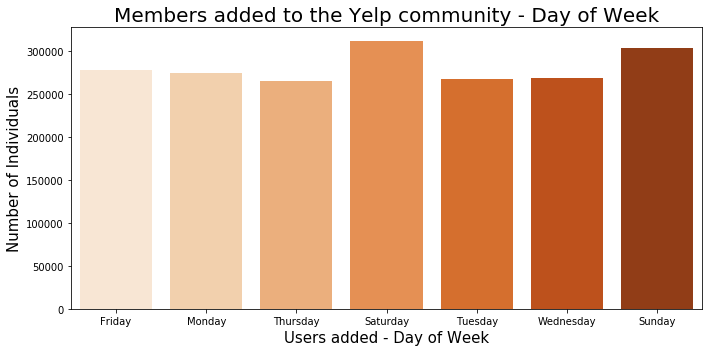

In [20]:
# Let's see how the users have changed over the day of week
plt.figure(figsize = (10,5))
sns.countplot(users['Member since - DayofWeek'], palette = 'Oranges' )
plt.xlabel('Users added - Day of Week', fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Members added to the Yelp community - Day of Week', fontsize = 20)
plt.tight_layout()
plt.show()